# Stimulants

This part asked about any form of prescription stimulants that were not prescribed for someone, or that someone took only for
the experience or feeling the drugs caused.
The use of drugs includingamphetamines that are known as stimulants, "uppers," or "speed."


In [6]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [7]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [8]:
case_quest_data = dataset.ix[:,0:2].copy()
stimulants = dataset.ix[:,'METHDES':'MTDAYPWK'].copy() # stimulants dataset

### 1. How many cases used the drug
There are 3242 cases in the survey.

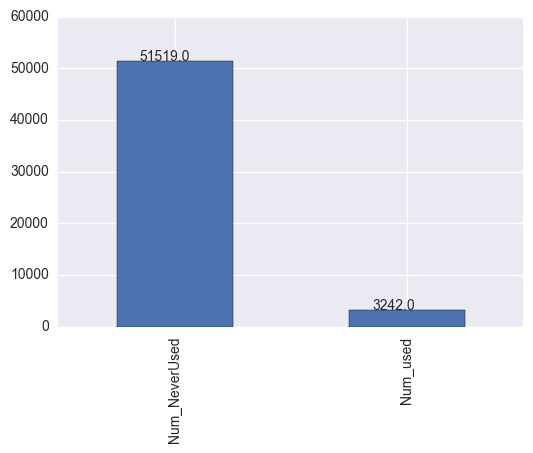

In [10]:

Num_NeverUsed=stimulants.query('METHDES ==91').shape[0]
Num_used=stimulants.query('(METHDES ==1)|(DIETPILS ==1)|(RITMPHEN ==1)|(STMCARD ==1)').shape[0]
Num =  {"Num":{"Num_NeverUsed":Num_NeverUsed, "Num_used":Num_used }}
DF_Num=pd.DataFrame(Num).sort_values('Num', ascending = False)
ax = DF_Num['Num'].plot.bar()
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))


###  2.What are their age range?

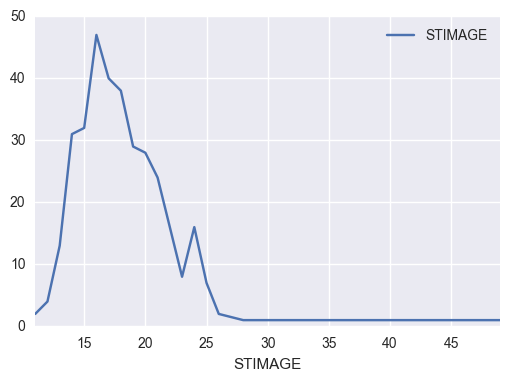

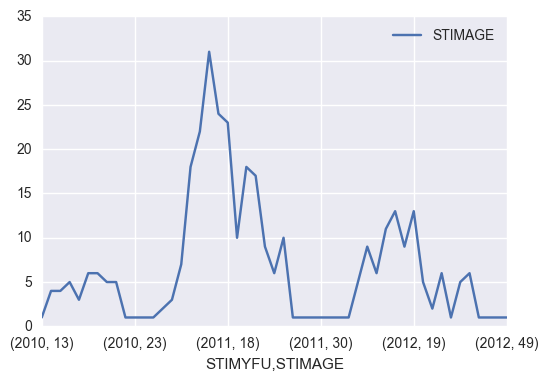

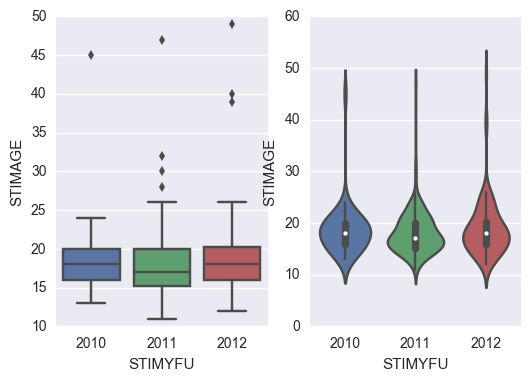

In [11]:
#query_data those who have used
stimulants_1=stimulants.query('((METHDES ==1)|(DIETPILS ==1)|(RITMPHEN ==1)|(STMCARD ==1))&(STIMAGE <69)&(STIMYFU<=2013)')
count = stimulants_1.groupby('STIMAGE').agg({ 'STIMAGE': 'count'})
count.plot()

# year & age
count_year = stimulants_1.groupby(['STIMYFU','STIMAGE']).agg({ 'STIMAGE': 'count'})
count_year.plot()

stimulants_1.plot(kind='scatter', x='STIMYFU',y='STIMAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='STIMYFU',y='STIMAGE',data=stimulants_1)
plt.subplot(122)
sns.violinplot(x='STIMYFU',y='STIMAGE',data=stimulants_1)


### 3.How frequently they use it?

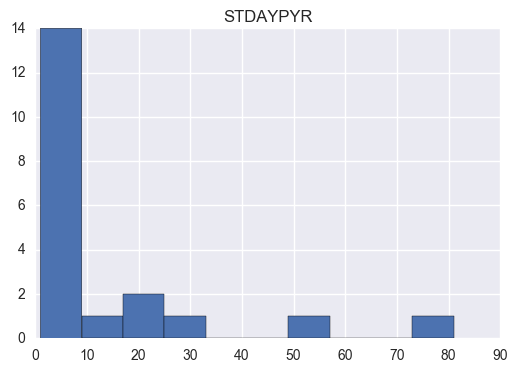

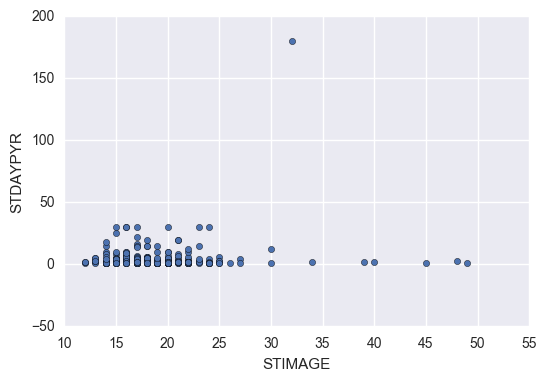

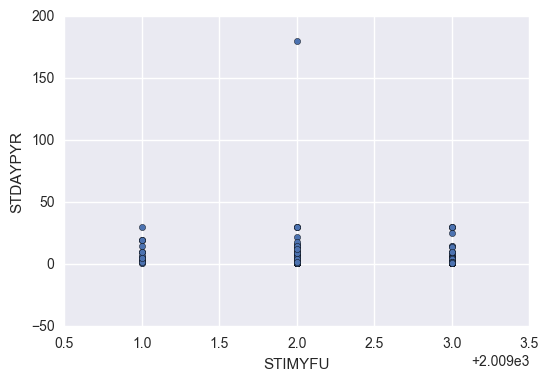

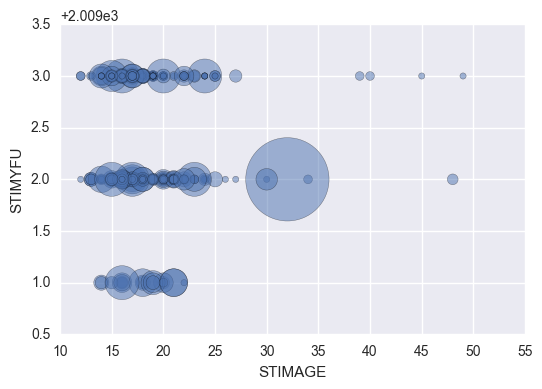

In [14]:
stimulants_fre=stimulants.query('(STDAYPYR<985)&(STIMAGE <=69)& (STIMYFU<=2012)')
count_days = stimulants_fre.groupby('STDAYPYR').agg({ 'STDAYPYR': 'count'})
count_days.hist()

stimulants_fre.plot(kind='scatter', x='STIMAGE',y='STDAYPYR')
stimulants_fre.plot(kind='scatter', x='STIMYFU',y='STDAYPYR')
stimulants_fre.plot(kind='scatter', x='STIMAGE',y='STIMYFU',s=stimulants_fre['STDAYPYR']*20,alpha=0.5)

### 4.Did they stop and go back to it? Are they planning to quit?

1 = Within the past 30 days
2 = More than 30 days ago but within the past 12 mons
3 = More than 12 months ago 

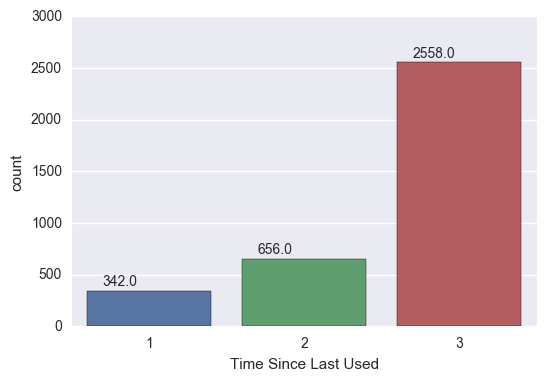

In [15]:

stimulants_quit=stimulants.query('STIMREC<4')
ax = sns.countplot(stimulants_quit['STIMREC'])
plt.xlabel('Time Since Last Used')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Sedatives](Sedatives.ipynb)